### Unsupervised Learning
### Covers KMeans, Hierarchical, DBSCAN, GMM, PCA, t-SNE on toy datasets



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

### 1. Generate toy datasets


In [5]:
datasets = {
    "Blobs": make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=1.0),
    "Moons": make_moons(n_samples=500, noise=0.07, random_state=42),
    "Circles": make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42),
}

# Helper function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=30, alpha=0.7)
    plt.title(title)
    plt.show()


### 2. Apply algorithms


===== Dataset: Blobs =====


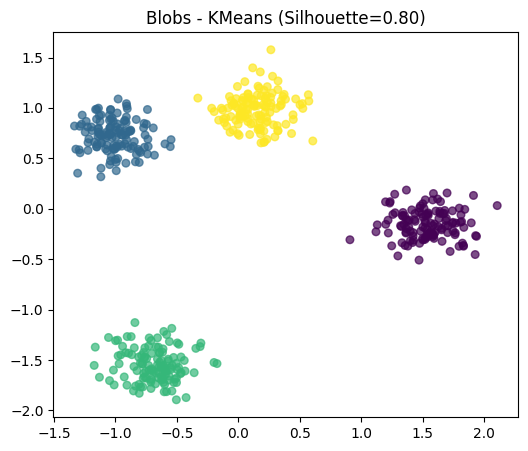

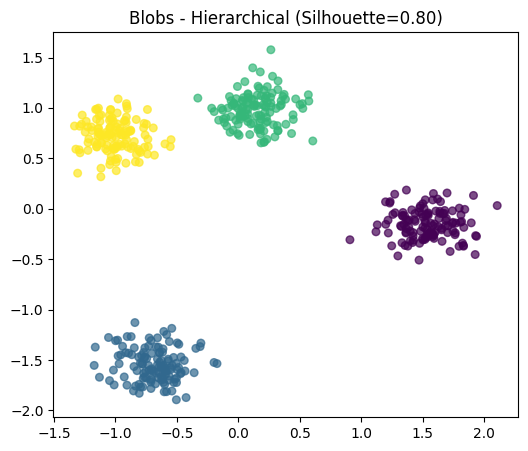

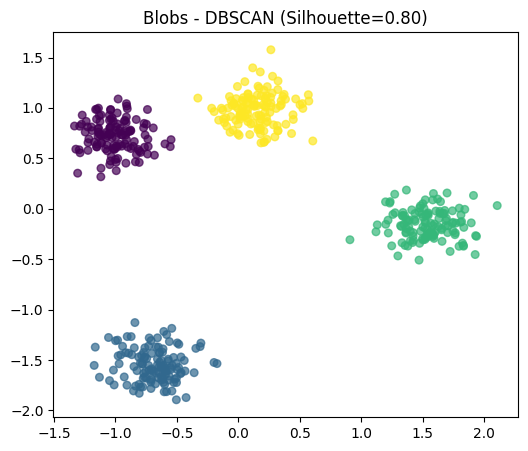

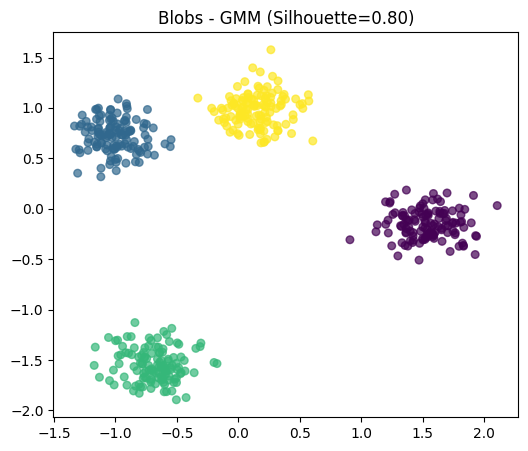


===== Dataset: Moons =====


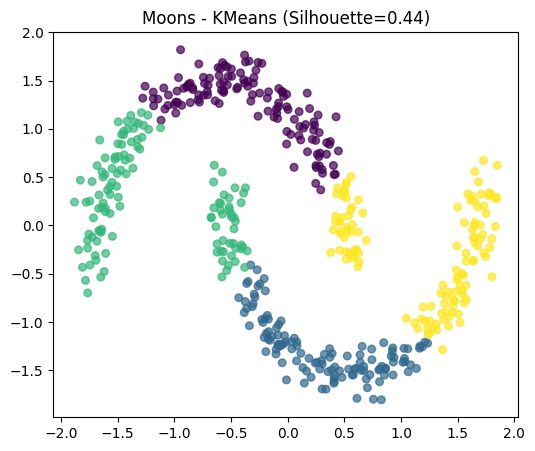

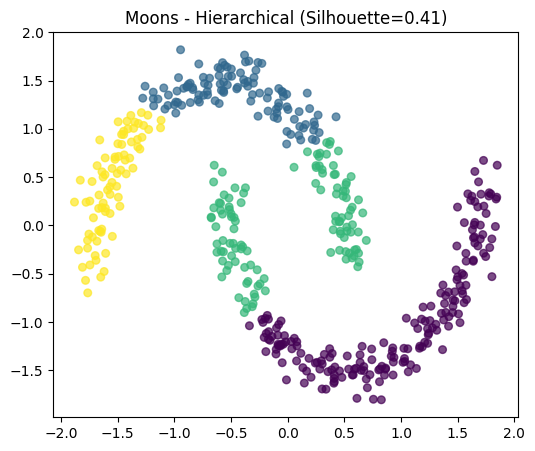

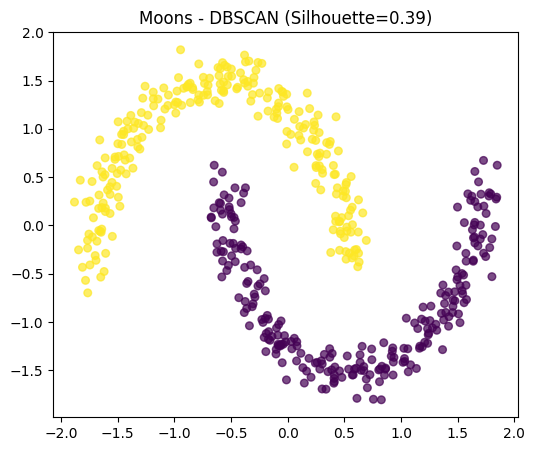

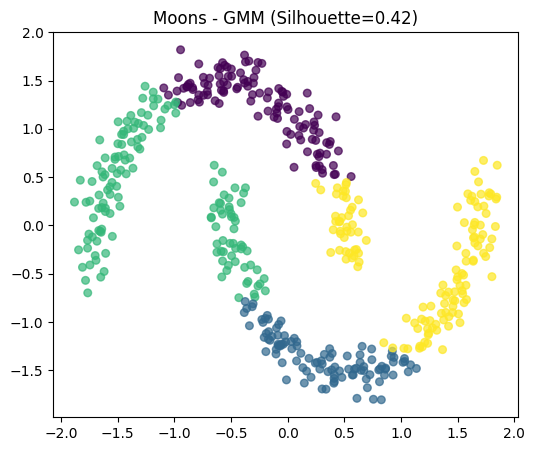


===== Dataset: Circles =====


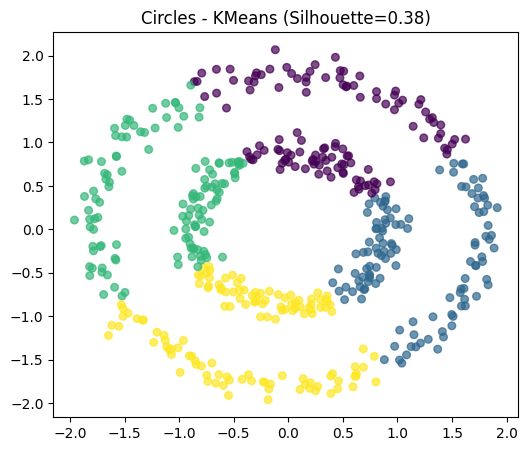

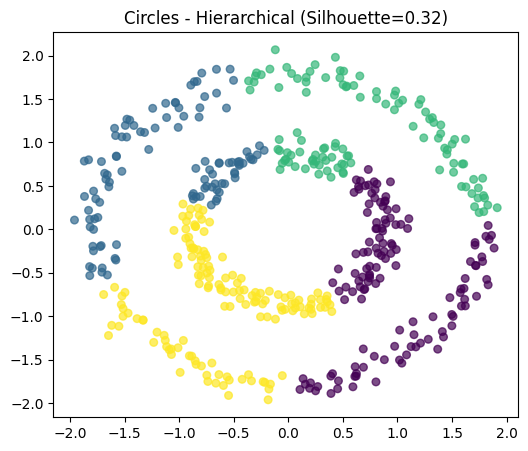

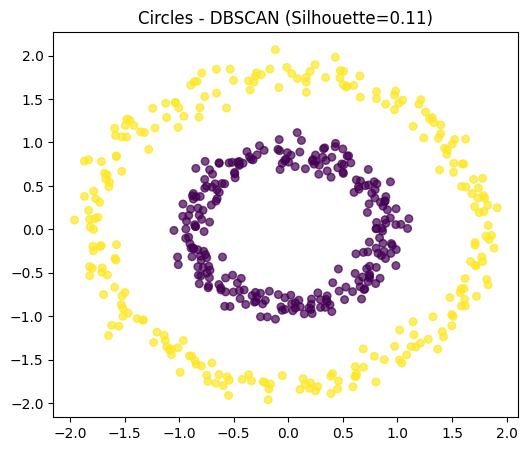

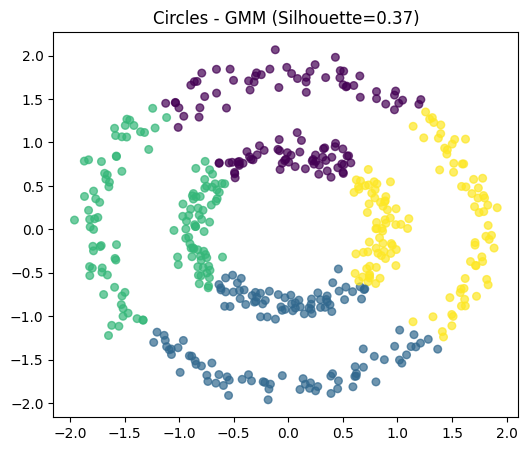

In [6]:
for name, (X, y_true) in datasets.items():
    print(f"\n===== Dataset: {name} =====")
    X_scaled = StandardScaler().fit_transform(X)

    # --- KMeans ---
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, kmeans_labels)
    plot_clusters(X_scaled, kmeans_labels, f"{name} - KMeans (Silhouette={score:.2f})")

    # --- Hierarchical Clustering ---
    hier = AgglomerativeClustering(n_clusters=4)
    hier_labels = hier.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, hier_labels)
    plot_clusters(X_scaled, hier_labels, f"{name} - Hierarchical (Silhouette={score:.2f})")

    # --- DBSCAN ---
    db = DBSCAN(eps=0.3, min_samples=5)
    db_labels = db.fit_predict(X_scaled)
    try:
        score = silhouette_score(X_scaled, db_labels) if len(set(db_labels)) > 1 else -1
    except:
        score = -1
    plot_clusters(X_scaled, db_labels, f"{name} - DBSCAN (Silhouette={score:.2f})")

    # --- Gaussian Mixture ---
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, gmm_labels)
    plot_clusters(X_scaled, gmm_labels, f"{name} - GMM (Silhouette={score:.2f})")

### 3. Dimensionality Reduction (PCA & t-SNE)


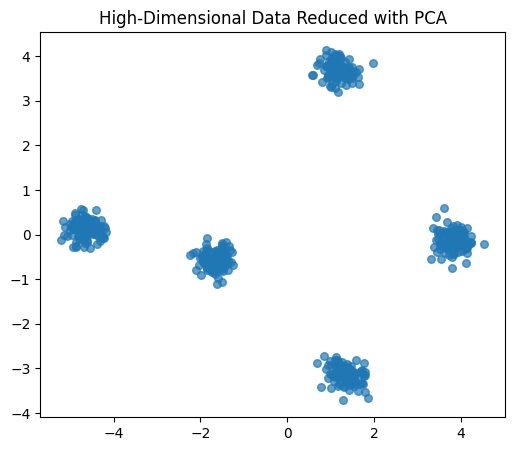

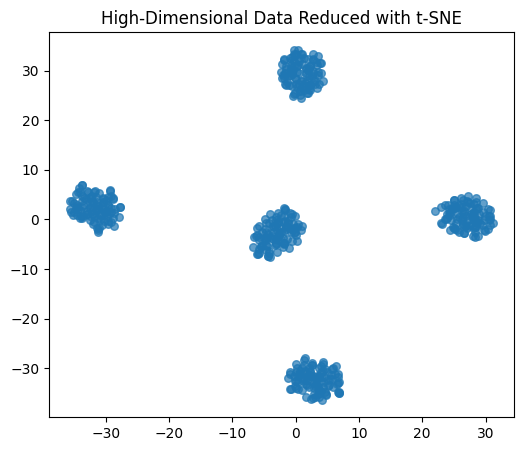

In [7]:
X, _ = make_blobs(n_samples=500, centers=5, n_features=20, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# PCA reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=30, alpha=0.7)
plt.title("High-Dimensional Data Reduced with PCA")
plt.show()

# t-SNE reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=30, alpha=0.7)
plt.title("High-Dimensional Data Reduced with t-SNE")
plt.show()
